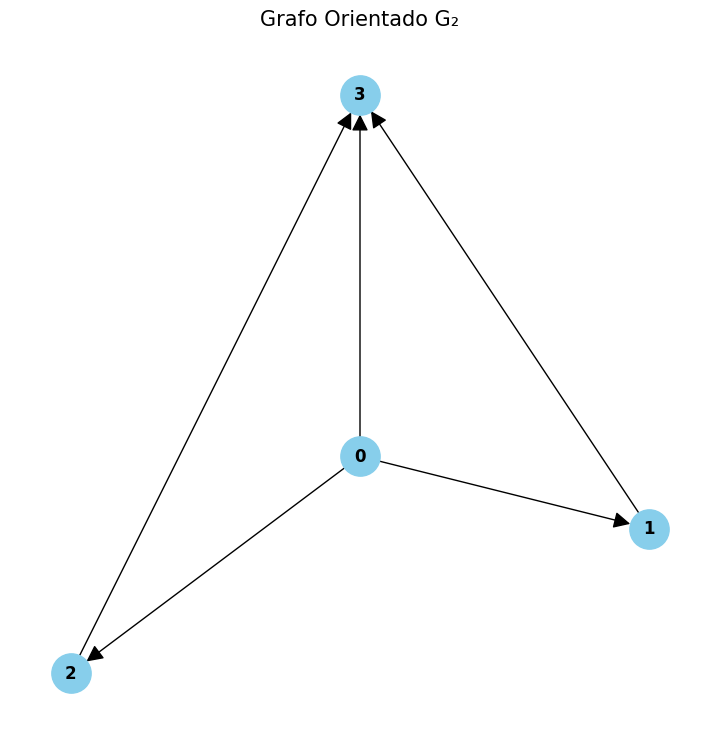

In [44]:
# GRAFO ORIENTADO

import networkx as nx
import matplotlib.pyplot as plt

# 1. Criar um objeto de Grafo Orientado (DiGraph)
G2 = nx.DiGraph()

# 2. Definir e adicionar os v√©rtices (n√≥s)
vertices = [0, 1, 2, 3]
G2.add_nodes_from(vertices)

# 3. Definir e adicionar os arcos (arestas direcionadas)
arcos = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
G2.add_edges_from(arcos)

# 4. Definir a posi√ß√£o dos n√≥s para replicar a imagem
# Este passo √© opcional, mas ajuda a manter a mesma apar√™ncia visual.
pos = {0: (0.4, 0.3), 1: (0.8, 0.2), 2: (0, 0), 3: (0.4, 0.8)}

# 5. Desenhar e exibir o grafo
plt.figure(figsize=(7, 7)) # Define o tamanho da imagem gerada

nx.draw(G2,
        pos,
        with_labels=True,      # Mostra os n√∫meros dos n√≥s
        node_color='skyblue',  # Define a cor dos n√≥s
        node_size=800,         # Define o tamanho dos n√≥s
        font_size=12,          # Define o tamanho da fonte
        font_weight='bold',    # Deixa a fonte em negrito
        arrowsize=25)          # Define o tamanho da seta

plt.title("Grafo Orientado G‚ÇÇ", size=15)
plt.show()

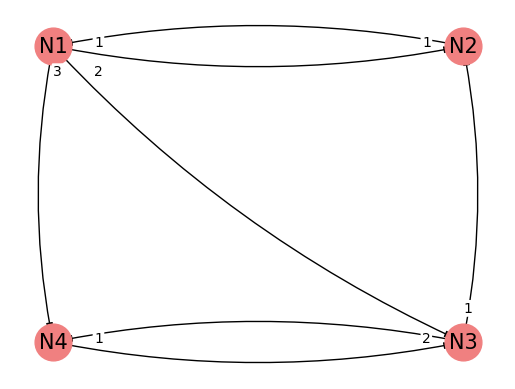

In [45]:
# GRAFO ORDENADO

import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as vari√°veis e algumas partes do c√≥digo para n√£o ficar id√™ntico.

# Adiciona as conex√µes (arestas) entre os v√©rtices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Adiciona uma aresta paralela de N2 para N3
#meu_grafo.add_edge('N2', 'N3', weight=1) 

# Define as coordenadas para o layout dos v√©rtices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os n√≥s (v√©rtices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os r√≥tulos dentro dos n√≥s
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenh√°-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao)

# Cria um dicion√°rio com os pesos para usar como r√≥tulos nas arestas
# Nota: Para multigrafos, isso armazena apenas o peso da √∫ltima aresta encontrada entre um par de n√≥s
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os r√≥tulos de peso perto do in√≠cio de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posi√ß√£o do texto um pouco deslocada da origem na dire√ß√£o do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.9 + x_destino * 0.1, 
                 y_origem * 0.9 + y_destino * 0.1)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Remove os eixos x e y para uma apar√™ncia mais limpa
plt.axis('off')
# Mostra o gr√°fico final
plt.show()



In [46]:
# FUN√á√ÉO PARA ENCONTRAR V√âRTICES-BASE/RAIZ E V√âRTICES-FOLHA
# UTILIZEI O MESMO EXEMPLO ANTERIOR (GRAFO ORDENADO)

import networkx as nx

def determinar_nos_terminais(grafo_a_verificar):
    """
    Identifica os n√≥s que s√£o pontos de partida (fontes) ou de chegada (sumidouros) em um grafo.

    Args:
        grafo_a_verificar (nx.DiGraph): O grafo direcionado a ser analisado.

    Returns:
        tuple: Uma tupla contendo duas listas: (n√≥s_fonte, n√≥s_sumidouro).
    """
    # Implementa√ß√£o com la√ßo 'for' para um estilo diferente:
    nos_fonte = []
    for no, grau_de_entrada in grafo_a_verificar.in_degree():
        if grau_de_entrada == 0:
            nos_fonte.append(no)

    nos_sumidouro = []
    for no, grau_de_saida in grafo_a_verificar.out_degree():
        if grau_de_saida == 0:
            nos_sumidouro.append(no)

    return nos_fonte, nos_sumidouro


def executar_analise_de_grafo():
    
    # Fun√ß√£o principal que constr√≥i um grafo, o analisa e exibe os resultados.
    
    # --- ETAPA 1: Constru√ß√£o do Grafo de forma alternativa ---
    
    # Define a estrutura do grafo como uma lista de arestas com peso
    lista_de_arestas_com_peso = [
        ('N1', 'N2', 1), ('N2', 'N1', 1), ('N1', 'N3', 2),
        ('N1', 'N4', 3), ('N3', 'N2', 1), ('N4', 'N3', 1),
        ('N3', 'N4', 2), ('N2', 'N3', 1)
    ]

    # Instancia o grafo e adiciona todas as arestas de uma vez
    grafo_principal = nx.MultiDiGraph()
    grafo_principal.add_weighted_edges_from(lista_de_arestas_com_peso)

    # --- ETAPA 2: An√°lise do Grafo e Exibi√ß√£o dos Resultados ---

    # 1. Encontra os n√≥s terminais (raiz e folha)
    fontes, sumidouros = determinar_nos_terminais(grafo_principal)

    print(f'V√©rtices-base/raiz: {fontes}')
    print(f'V√©rtices-folha: {sumidouros}')
    print("====================") # Separador visual alterado

    # 2. Calcula os graus de cada n√≥ de forma mais direta
    graus_de_saida = dict(grafo_principal.out_degree())
    graus_de_entrada = dict(grafo_principal.in_degree())

    # 3. Apresenta os graus calculados
    print("Ramifica√ß√£o de Sa√≠da:", graus_de_saida)
    print("Ramifica√ß√£o de Entrada:", graus_de_entrada)


# Ponto de entrada padr√£o para a execu√ß√£o do script
if __name__ == "__main__":
    executar_analise_de_grafo()

V√©rtices-base/raiz: []
V√©rtices-folha: []
Ramifica√ß√£o de Sa√≠da: {'N1': 3, 'N2': 2, 'N3': 2, 'N4': 1}
Ramifica√ß√£o de Entrada: {'N1': 1, 'N2': 2, 'N3': 3, 'N4': 2}


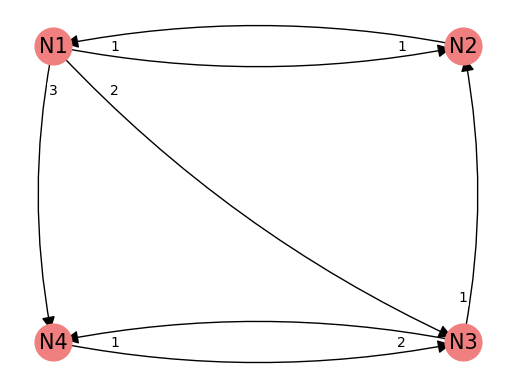

Caminhos de 'N1' para 'N3':
['N1', 'N3']
['N1', 'N4', 'N3']
--------------------
O grafo √© c√≠clico? Sim
--------------------
Um ciclo encontrado no grafo: [('N1', 'N2', 0), ('N2', 'N1', 0)]


In [47]:
# CAMINHOS E CICLOS EM GRAFOS
# UTILIZEI O MESMO GRAFO COMO EXEMPLO 
import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as vari√°veis e algumas partes do c√≥digo para n√£o ficar id√™ntico.

# Adiciona as conex√µes (arestas) entre os v√©rtices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Aresta de N2 para N3 removida (comentada)
# meu_grafo.add_edge('N2', 'N3', weight=1)


# --- C√ìDIGO PARA DESENHAR O GRAFO (sem altera√ß√µes) ---

# Define as coordenadas para o layout dos v√©rtices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os n√≥s (v√©rtices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os r√≥tulos dentro dos n√≥s
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenh√°-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao, arrows=True, arrowsize=20)

# Cria um dicion√°rio com os pesos para usar como r√≥tulos nas arestas
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os r√≥tulos de peso perto do in√≠cio de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posi√ß√£o do texto um pouco deslocada da origem na dire√ß√£o do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.85 + x_destino * 0.15, 
                 y_origem * 0.85 + y_destino * 0.15)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'),
             horizontalalignment='center', verticalalignment='center')

# Remove os eixos x e y para uma apar√™ncia mais limpa
plt.axis('off')
# Mostra o gr√°fico final
plt.show()

# --- IN√çCIO DA SE√á√ÉO DE AN√ÅLISE ADICIONADA ---

# Encontrando caminhos (exemplo: de N1 para N3)
print("Caminhos de 'N1' para 'N3':")
# Usamos o grafo 'meu_grafo' e os n√≥s existentes
for path in nx.all_simple_paths(meu_grafo, source='N1', target='N3'):
    print(path)
print("-" * 20) # Separador

# Verificando a exist√™ncia de ciclos
# A fun√ß√£o is_directed_acyclic_graph retorna True se N√ÉO houver ciclos.
is_acyclic = nx.is_directed_acyclic_graph(meu_grafo)
print(f"O grafo √© c√≠clico? {'N√£o' if is_acyclic else 'Sim'}")
print("-" * 20) # Separador

# Identificando um ciclo (se houver)
try:
    # Usamos o grafo 'meu_grafo'
    cycle = nx.find_cycle(meu_grafo)
    print("Um ciclo encontrado no grafo:", cycle)
except nx.NetworkXNoCycle:
    print("O grafo √© ac√≠clico (n√£o possui ciclos).")

# --- FIM DA SE√á√ÉO DE AN√ÅLISE ---

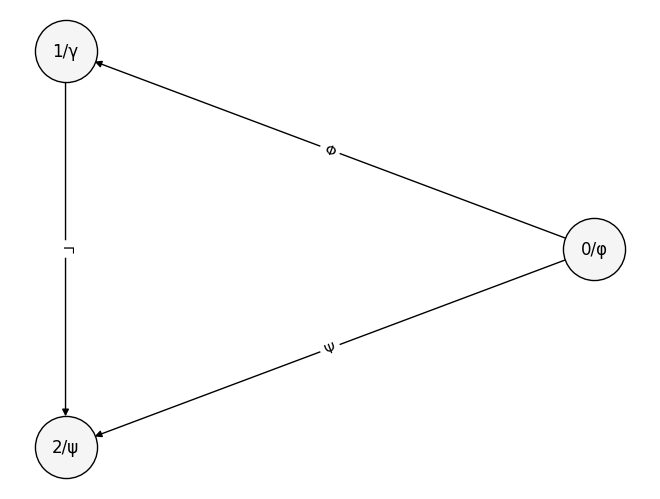

In [48]:
# GRAFO ROTULADO
# UTILIZANDO O EXEMPLO DADO PELO PROFESSOR

import networkx as nx
import matplotlib.pyplot as plt

# Instancia um grafo direcionado
grafo = nx.DiGraph()

# Insere arestas com r√≥tulos entre os n√≥s
grafo.add_edge('0', '1', label='Œ¶')
grafo.add_edge('1', '2', label='Œì')
grafo.add_edge('0', '2', label='Œ®')

# Define os r√≥tulos personalizados para os v√©rtices
rotulos_vertices = {'0': 'œÜ', '1': 'Œ≥', '2': 'œà'}
for vertice in grafo.nodes:
    grafo.nodes[vertice]['rotulo'] = rotulos_vertices[vertice]

# Define a disposi√ß√£o dos n√≥s em c√≠rculo
layout = nx.circular_layout(grafo)

# Desenha os n√≥s sem r√≥tulos por padr√£o
nx.draw(grafo, layout, with_labels=False, node_size=2000, node_color='whitesmoke', edgecolors='black')

# Adiciona os r√≥tulos personalizados aos v√©rtices
for no, (x, y) in layout.items():
    plt.text(x, y, f'{no}/{grafo.nodes[no]["rotulo"]}', fontsize=12, ha='center', va='center')

# Extrai e desenha os r√≥tulos das arestas
rotulos_arestas = nx.get_edge_attributes(grafo, 'label')
nx.draw_networkx_edge_labels(grafo, layout, edge_labels=rotulos_arestas, font_color='black')

# Remove os eixos para uma visualiza√ß√£o limpa
plt.axis('off')
plt.show()


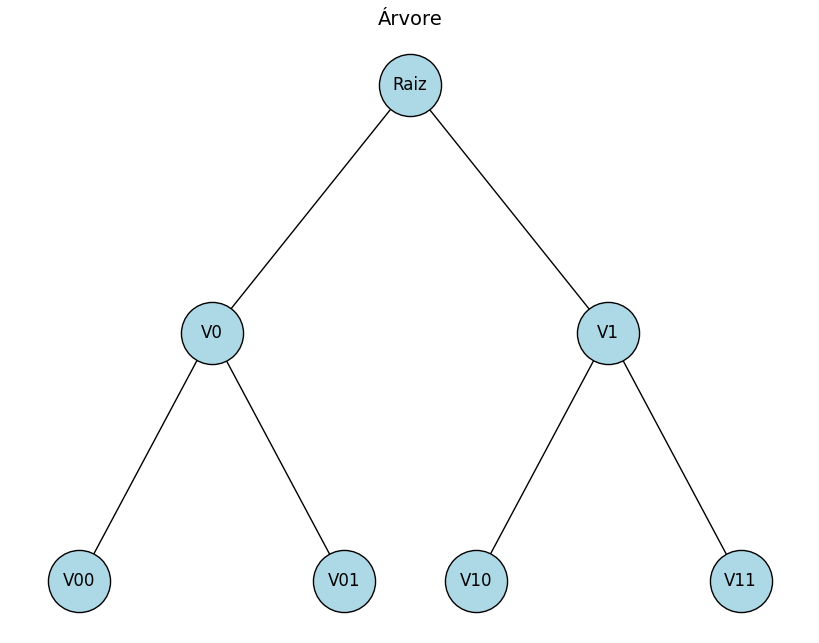

O grafo √© ac√≠clico? True
Raiz do grafo: ['Raiz']
Folhas do grafo: ['V00', 'V01', 'V10', 'V11']
Graus de entrada: {'Raiz': 0, 'V0': 1, 'V1': 1, 'V00': 1, 'V01': 1, 'V10': 1, 'V11': 1}
Graus de sa√≠da: {'Raiz': 2, 'V0': 2, 'V1': 2, 'V00': 0, 'V01': 0, 'V10': 0, 'V11': 0}


In [7]:
# ARVORES, RAIZ, FOLHAS, N√ìS DE ENTRADA E SA√çDA

import networkx as nx
import matplotlib.pyplot as plt

# Criando a √°rvore
arvore = nx.DiGraph()
arvore.add_edges_from([
    ('Raiz', 'V0'),
    ('Raiz', 'V1'),
    ('V0', 'V00'),
    ('V0', 'V01'),
    ('V1', 'V10'),
    ('V1', 'V11'),
])

# Layout manual com n√≠veis (estilo √°rvore)
posicoes = {
    'Raiz': (0, 3),
    'V0': (-1.5, 2),
    'V1': (1.5, 2),
    'V00': (-2.5, 1),
    'V01': (-0.5, 1),
    'V10': (0.5, 1),
    'V11': (2.5, 1),
}

# Desenhando a √°rvore
plt.figure(figsize=(8, 6))
nx.draw(arvore, posicoes, with_labels=True, node_size=2000, node_color='lightblue', edgecolors='black', arrows=False)
plt.title("√Årvore", fontsize=14)
plt.axis('off')
#plt.tight_layout()
plt.show()


# Fun√ß√£o para analisar propriedades da √°rvore (sem list comprehension)
def analisar_arvore(grafo):
    # Verificar se √© ac√≠clico
    aciclico = nx.is_directed_acyclic_graph(grafo)
    print(f"O grafo √© ac√≠clico? {aciclico}")

    # Identificar raiz (grau de entrada zero)
    raiz = []
    for vertice, grau in grafo.in_degree():
        if grau == 0:
            raiz.append(vertice)
    print(f"Raiz do grafo: {raiz}")

    # Identificar folhas (grau de sa√≠da zero)
    folhas = []
    for vertice, grau in grafo.out_degree():
        if grau == 0:
            folhas.append(vertice)
    print(f"Folhas do grafo: {folhas}")

    # Calcular graus de entrada
    graus_entrada = {}
    for vertice, grau in grafo.in_degree():
        graus_entrada[vertice] = grau

    # Calcular graus de sa√≠da
    graus_saida = {}
    for vertice, grau in grafo.out_degree():
        graus_saida[vertice] = grau

    print(f"Graus de entrada: {graus_entrada}")
    print(f"Graus de sa√≠da: {graus_saida}")

    return aciclico, raiz, folhas, graus_entrada, graus_saida


# Chamada da fun√ß√£o de an√°lise
propriedades = analisar_arvore(arvore)


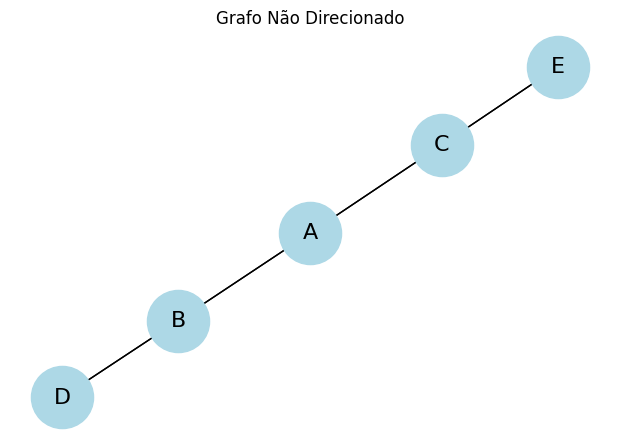


üîÑ Passo 1:
Desenfileirando: A
Visitados: {'A'}
Fila: ['B', 'C']

üîÑ Passo 2:
Desenfileirando: B
Visitados: {'A', 'B'}
Fila: ['C', 'D']

üîÑ Passo 3:
Desenfileirando: C
Visitados: {'A', 'C', 'B'}
Fila: ['D', 'E']

üîÑ Passo 4:
Desenfileirando: D
Visitados: {'D', 'A', 'C', 'B'}
Fila: ['E']

üîÑ Passo 5:
Desenfileirando: E
Visitados: {'E', 'B', 'D', 'A', 'C'}
Fila: []

‚úÖ Ordem final de visita: A ‚Üí B ‚Üí C ‚Üí D ‚Üí E


['A', 'B', 'C', 'D', 'E']

In [8]:
# BUSCA EM LARGURA (BFS)
# REALIZANDO O EXEMPLO INTUITIVO

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Criando o grafo n√£o dirigido
G = nx.Graph()

# Adicionando v√©rtices e arestas
vertices = ['A', 'B', 'C', 'D', 'E']
arestas = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E')]
G.add_nodes_from(vertices)
G.add_edges_from(arestas)

# Fun√ß√£o de busca em largura (BFS)
def bfs(grafo, inicio):
    visitados = set()
    fila = deque([inicio])
    ordem_visita = []

    passo = 1
    while fila:
        print(f"\nüîÑ Passo {passo}:")
        atual = fila.popleft()
        print(f"Desenfileirando: {atual}")

        if atual not in visitados:
            visitados.add(atual)
            ordem_visita.append(atual)
            print(f"Visitados: {visitados}")

            for vizinho in sorted(grafo.neighbors(atual)):
                if vizinho not in visitados:
                    fila.append(vizinho)
            print(f"Fila: {list(fila)}")
        else:
            print(f"{atual} j√° visitado")

        passo += 1

    print(f"\n‚úÖ Ordem final de visita: {' ‚Üí '.join(ordem_visita)}")
    return ordem_visita

# Desenhar o grafo
pos = nx.spring_layout(G)  # Layout para posicionar os n√≥s
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16)
nx.draw_networkx_edges(G, pos)
plt.title("Grafo N√£o Direcionado")
plt.show()

# Executar a BFS a partir do n√≥ 'A'
bfs(G, 'A')


Valor final alcan√ßado: 240.0
Propor√ß√µes dos itens utilizados: [1, 1, 0.6666666666666666]


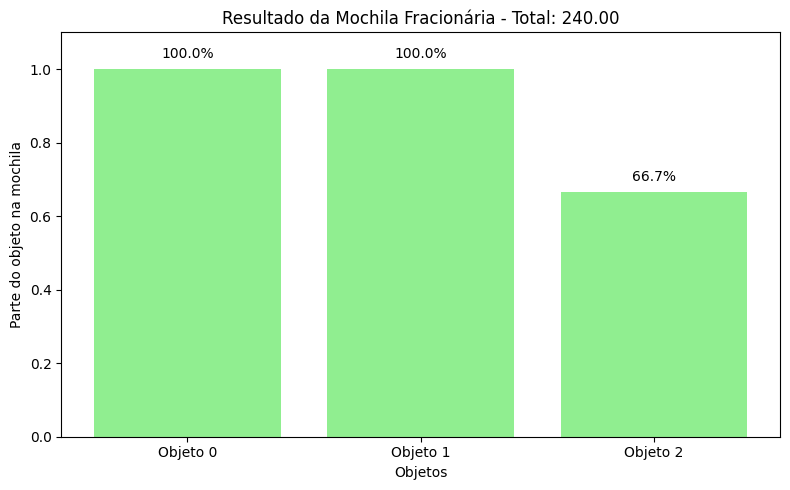

In [1]:
# ALGORITMOS GULOSOS - MOCHILA FRACION√ÅRIA

import matplotlib.pyplot as plt

def mochila_fracionaria(valores, pesos, limite):
    """
    Resolve o problema da mochila fracion√°ria utilizando uma abordagem gulosa.
    
    Par√¢metros:
    - valores: lista com os valores de cada item.
    - pesos: lista com os pesos correspondentes de cada item.
    - limite: capacidade m√°xima da mochila.
    
    Retorna:
    - valor_acumulado: valor total obtido com os itens (ou fra√ß√µes deles).
    - proporcoes: lista com a fra√ß√£o de cada item colocada na mochila.
    """

    # Cria√ß√£o de uma lista de tuplas: (efici√™ncia, valor, peso, √≠ndice original)
    # Efici√™ncia √© a raz√£o valor/peso, usada como crit√©rio de sele√ß√£o gulosa
    itens = [(val/peso, val, peso, idx) for idx, (val, peso) in enumerate(zip(valores, pesos))]

    # Ordena os itens com base na efici√™ncia (valor/peso), do maior para o menor
    itens.sort(reverse=True)

    # Inicializa o valor total acumulado e a capacidade restante da mochila
    valor_acumulado = 0.0
    espaco_restante = limite

    # Lista que armazena a fra√ß√£o escolhida de cada item (0 a 1)
    proporcoes = [0] * len(valores)

    # Itera sobre os itens ordenados para preencher a mochila
    for eficiencia, val, peso, pos in itens:
        if peso <= espaco_restante:
            # Se o item inteiro cabe na mochila, adiciona ele completamente
            valor_acumulado += val
            proporcoes[pos] = 1  # Usou 100% do item
            espaco_restante -= peso  # Reduz o espa√ßo dispon√≠vel
        else:
            # Se o item n√£o cabe inteiro, calcula a fra√ß√£o que cabe
            parte = espaco_restante / peso
            valor_acumulado += val * parte  # Valor proporcional adicionado
            proporcoes[pos] = parte  # Registra a fra√ß√£o usada
            break  # A mochila atingiu sua capacidade, n√£o cabe mais nada

    # Retorna o valor obtido e a lista de fra√ß√µes de cada item
    return valor_acumulado, proporcoes

# ------------------------------
# BLOCO PRINCIPAL DO PROGRAMA
# ------------------------------

# Define os dados de entrada: valores, pesos e capacidade m√°xima
valores = [60, 100, 120]
pesos = [10, 20, 30]
capacidade_maxima = 50

# Chamada da fun√ß√£o para resolver o problema
valor_total, fracoes = mochila_fracionaria(valores, pesos, capacidade_maxima)

# Mostra os resultados no terminal
print("Valor final alcan√ßado:", valor_total)
print("Propor√ß√µes dos itens utilizados:", fracoes)

# ------------------------------
# VISUALIZA√á√ÉO GR√ÅFICA
# ------------------------------

# Cria um gr√°fico de barras representando a fra√ß√£o de cada item usado
plt.figure(figsize=(8, 5))
posicoes = range(len(valores))

# Desenha as barras
plt.bar(posicoes, fracoes, tick_label=[f"Objeto {i}" for i in posicoes], color='lightgreen')

# Adiciona r√≥tulos e t√≠tulo
plt.xlabel('Objetos')
plt.ylabel('Parte do objeto na mochila')
plt.title(f'Resultado da Mochila Fracion√°ria - Total: {valor_total:.2f}')
plt.ylim(0, 1.1)  # Limite do eixo Y (at√© 110% para acomodar os r√≥tulos)

# Adiciona texto acima de cada barra com a porcentagem
for i, frac in enumerate(fracoes):
    plt.text(i, frac + 0.03, f"{frac * 100:.1f}%", ha='center')

# Ajusta layout e exibe o gr√°fico
plt.tight_layout()
plt.show()


Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]


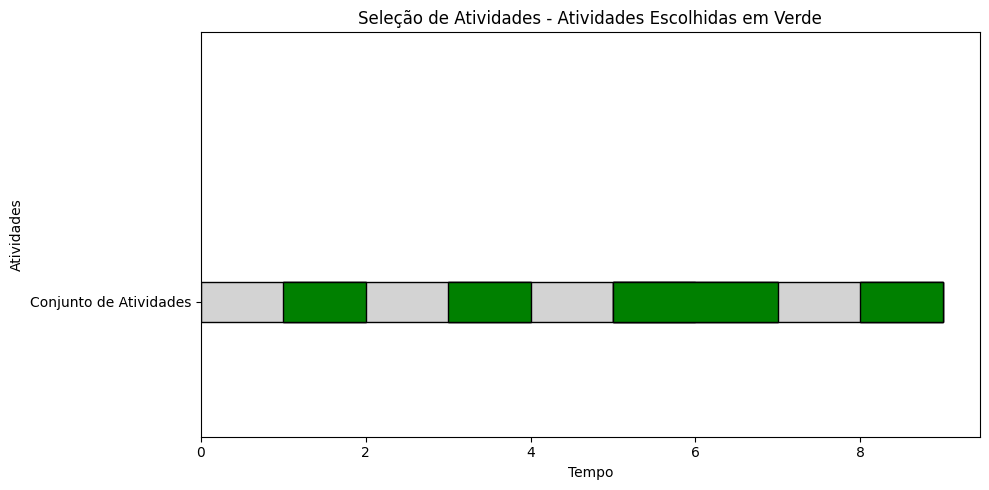

In [2]:
# ALGORITMOS GULOSOS - SELE√á√ÉO DE ATIVIDADE

import matplotlib.pyplot as plt

def selecionar_atividades_recursivo(inicios, fins, fim_anterior=-1, pos=0):
    """
    Seleciona atividades de forma recursiva, garantindo que nenhuma se sobreponha.
    
    Par√¢metros:
    - inicios: lista com hor√°rios de in√≠cio das atividades.
    - fins: lista com hor√°rios de t√©rmino das atividades.
    - fim_anterior: guarda o t√©rmino da √∫ltima atividade aceita.
    - pos: posi√ß√£o atual sendo analisada.
    
    Retorna:
    - Lista de tuplas (in√≠cio, fim) representando as atividades selecionadas.
    """
    # Caso base: quando j√° analisamos todas as atividades
    if pos >= len(inicios):
        return []

    # Verifica se a atividade atual pode ser inclu√≠da
    if inicios[pos] >= fim_anterior:
        # Se puder, inclui e continua a busca com fim atualizado
        escolhidas = [(inicios[pos], fins[pos])] + \
                     selecionar_atividades_recursivo(inicios, fins, fins[pos], pos + 1)
    else:
        # Caso contr√°rio, ignora a atual e tenta a pr√≥xima
        escolhidas = selecionar_atividades_recursivo(inicios, fins, fim_anterior, pos + 1)

    return escolhidas

def selecionar_atividades(inicios, fins):
    """
    Seleciona atividades de forma iterativa (gulosa) com base no menor tempo de t√©rmino.

    Par√¢metros:
    - inicios: lista de hor√°rios de in√≠cio.
    - fins: lista de hor√°rios de fim.

    Retorna:
    - Lista com as atividades (in√≠cio, fim) selecionadas.
    """
    # Une in√≠cio e fim em tuplas e ordena pelo tempo de t√©rmino (fim)
    tarefas = list(zip(inicios, fins))
    tarefas.sort(key=lambda x: x[1])  # Ordena pelo segundo elemento da tupla (fim)

    # Lista que guardar√° as atividades aceitas
    escolhidas = []

    # Guarda o fim da √∫ltima atividade aceita
    fim_atual = -1

    # Analisa cada atividade
    for inicio, fim in tarefas:
        if inicio >= fim_atual:
            escolhidas.append((inicio, fim))  # Adiciona √† lista final
            fim_atual = fim  # Atualiza o fim atual

    return escolhidas

# ------------------------------
# DADOS DE ENTRADA
# ------------------------------

inicios = [1, 3, 0, 5, 8, 5]
fins = [2, 4, 6, 7, 9, 9]

# Sele√ß√£o gulosa (iterativa)
selecionadas_iterativo = selecionar_atividades(inicios, fins)

# Pr√©-processamento: ordenar atividades para a vers√£o recursiva
atividades_ordenadas = sorted(zip(inicios, fins), key=lambda x: x[1])
inicios_ordenados, fins_ordenados = zip(*atividades_ordenadas)

# Sele√ß√£o recursiva
selecionadas_recursivo = selecionar_atividades_recursivo(inicios_ordenados, fins_ordenados)

# Exibi√ß√£o no console
print("Atividades selecionadas (recursivo):", selecionadas_recursivo)
# Sa√≠da esperada: [(1, 2), (3, 4), (5, 7), (8, 9)]

# ------------------------------
# VISUALIZA√á√ÉO GR√ÅFICA
# ------------------------------

plt.figure(figsize=(10, 5))
nivel_y = 1         # Altura para desenhar as barras
altura_barra = 0.3  # Espessura da barra

# Desenha todas as atividades em cinza
for ini, fim in zip(inicios_ordenados, fins_ordenados):
    plt.barh(nivel_y, fim - ini, left=ini, height=altura_barra,
             color='lightgray', edgecolor='black')

# Destaca as atividades selecionadas em verde
for ini, fim in selecionadas_iterativo:
    plt.barh(nivel_y, fim - ini, left=ini, height=altura_barra,
             color='green', edgecolor='black')

# Personaliza√ß√£o do gr√°fico
plt.xlabel('Tempo')
plt.ylabel('Atividades')
plt.title('Sele√ß√£o de Atividades - Atividades Escolhidas em Verde')
plt.yticks([nivel_y], ["Conjunto de Atividades"])
plt.ylim(nivel_y - 1, nivel_y + 2)
plt.tight_layout()
plt.show()


In [6]:
# ALGORITMOS GULOSOS - PROBLEMAS DAS MOEDAS OU TROCO M√çNIMO

import sys

def troco_minimo_recursivo(moedas, valor_restante, pos=0, total_usadas=0):
    """
    Abordagem recursiva gulosa para calcular o n√∫mero m√≠nimo de moedas.
    
    :param moedas: Lista de denomina√ß√µes ordenadas em ordem decrescente.
    :param valor_restante: Valor que ainda precisa ser completado.
    :param pos: √çndice atual da moeda sendo analisada.
    :param total_usadas: Contador de moedas usadas at√© o momento.
    :return: Total de moedas usadas ou infinito se n√£o for poss√≠vel atingir o valor.
    """
    # Caso base: valor alcan√ßado
    if valor_restante == 0:
        return total_usadas

    # Caso base: esgotou as moedas ou valor negativo
    if pos >= len(moedas) or valor_restante < 0:
        return float('inf')

    # Pega o m√°ximo de moedas dessa denomina√ß√£o poss√≠vel
    max_usos = valor_restante // moedas[pos]

    # Atualiza os valores e segue para a pr√≥xima moeda
    novo_valor = valor_restante - max_usos * moedas[pos]
    return troco_minimo_recursivo(moedas, novo_valor, pos + 1, total_usadas + max_usos)

def resolver_troco_guloso(moedas, valor):
    """
    Fun√ß√£o auxiliar para iniciar a recurs√£o com moedas ordenadas.
    
    :param moedas: Lista de moedas dispon√≠veis.
    :param valor: Valor-alvo.
    :return: M√≠nimo n√∫mero de moedas necess√°rias ou -1 se n√£o for poss√≠vel.
    """
    moedas.sort(reverse=True)
    resultado = troco_minimo_recursivo(moedas, valor)
    return resultado if resultado != float('inf') else -1

def troco_guloso_iterativo(moedas, alvo):
    """
    Abordagem iterativa gulosa para encontrar o troco m√≠nimo.
    
    :param moedas: Lista de denomina√ß√µes dispon√≠veis.
    :param alvo: Valor que se deseja atingir.
    :return: N√∫mero de moedas usadas e a lista de (moeda, quantidade).
    """
    moedas.sort(reverse=True)  # Ordena para pegar sempre a maior moeda primeiro
    total_moedas = 0           # Total de moedas utilizadas
    combinacao = []            # Lista de tuplas (moeda, quantidade usada)
    restante = alvo            # Valor que falta completar

    for moeda in moedas:
        quantidade = restante // moeda
        if quantidade > 0:
            combinacao.append((moeda, quantidade))
            total_moedas += quantidade
            restante -= quantidade * moeda

        if restante == 0:
            break  # J√° atingimos o valor desejado

    if restante != 0:
        return -1, []  # Imposs√≠vel montar o valor com as moedas dadas

    return total_moedas, combinacao

# ------------------------
# EXEMPLO DE USO
# ------------------------

disponiveis = [1, 5, 10, 25]
valor_desejado = 63

# Vers√£o iterativa gulosa
minimo_moedas, combinacao_utilizada = troco_guloso_iterativo(disponiveis, valor_desejado)

print("N√∫mero m√≠nimo de moedas:", minimo_moedas)
print("Combina√ß√£o de moedas:")
for moeda, qtd in combinacao_utilizada:
    print(f"{qtd} moeda(s) de {moeda}")
# Sa√≠da esperada:
# N√∫mero m√≠nimo de moedas: 6
# 2 moeda(s) de 25
# 1 moeda(s) de 10
# 3 moeda(s) de 1

# Vers√£o recursiva gulosa
resultado_recursivo = resolver_troco_guloso(disponiveis, valor_desejado)
print("N√∫mero m√≠nimo de moedas (recursivo):", resultado_recursivo)
# Sa√≠da esperada: 6


N√∫mero m√≠nimo de moedas: 6
Combina√ß√£o de moedas:
2 moeda(s) de 25
1 moeda(s) de 10
3 moeda(s) de 1
N√∫mero m√≠nimo de moedas (recursivo): 6


AN√ÅLISE DE CAMINHOS A PARTIR DE 'A'
-> Para 'A':
   - Dist√¢ncia M√≠nima: 0
   - Caminho: A
-> Para 'B':
   - Dist√¢ncia M√≠nima: 2
   - Caminho: A ‚Üí B
-> Para 'C':
   - Dist√¢ncia M√≠nima: 3
   - Caminho: A ‚Üí B ‚Üí C
-> Para 'D':
   - Dist√¢ncia M√≠nima: 7
   - Caminho: A ‚Üí B ‚Üí C ‚Üí E ‚Üí D
-> Para 'E':
   - Dist√¢ncia M√≠nima: 6
   - Caminho: A ‚Üí B ‚Üí C ‚Üí E
----------------------------------------

Gerando gr√°fico com o caminho para 'E' destacado...


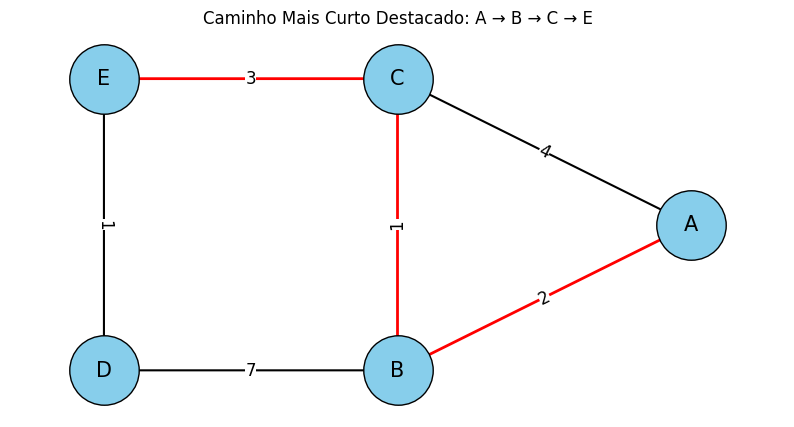

In [ ]:
# ALGORITMOS GULOSOS - ALGORITMO DE DIJKSTRA

"""
Script Completo para An√°lise de Grafos com Dijkstra e Visualiza√ß√£o

Este script realiza as seguintes opera√ß√µes:
1. Define um grafo ponderado representando cidades e dist√¢ncias.
2. Utiliza o algoritmo de Dijkstra para encontrar o caminho mais curto de uma cidade de origem para todas as outras.
3. Imprime os resultados (dist√¢ncia e caminho) no console.
4. Gera uma visualiza√ß√£o gr√°fica estilizada, destacando o caminho mais curto para um destino espec√≠fico.
"""

# --------------------------------------------------------------------------
# 1. IMPORTA√á√ÉO DE BIBLIOTECAS
# --------------------------------------------------------------------------
import networkx as nx
import matplotlib.pyplot as plt


# --------------------------------------------------------------------------
# 2. FUN√á√ïES DO ALGORITMO (L√ìGICA CENTRAL)
# --------------------------------------------------------------------------

def encontrar_menor_caminho(grafo, inicio):
    """
    Encontra os menores caminhos de um n√≥ de origem para todos os outros usando Dijkstra.

    Esta implementa√ß√£o utiliza uma lista simples para gerenciar os n√≥s n√£o visitados, sendo
    ideal para fins did√°ticos.

    :param grafo: Dicion√°rio representando o grafo. Ex: {'A': [('B', 2), ...]}
    :param inicio: O n√≥ (v√©rtice) de partida.
    :return: Uma tupla contendo dois dicion√°rios:
             - distancias: As menores dist√¢ncias da origem para cada n√≥.
             - predecessores: O n√≥ anterior no caminho mais curto para cada n√≥.
    """
    # Inicializa as dist√¢ncias com infinito e a da origem como 0.
    distancias = {vertice: float('inf') for vertice in grafo}
    distancias[inicio] = 0
    
    # Dicion√°rio para reconstruir o caminho posteriormente.
    predecessores = {vertice: None for vertice in grafo}
    
    # Lista de todos os n√≥s que ainda n√£o foram processados.
    nao_visitados = list(grafo.keys())

    while nao_visitados:
        # Seleciona o n√≥ n√£o visitado com a menor dist√¢ncia atual.
        vertice_atual = min(nao_visitados, key=lambda vertice: distancias[vertice])
        
        # Remove o n√≥ atual da lista de n√£o visitados, pois ser√° processado agora.
        nao_visitados.remove(vertice_atual)
        
        # Para cada vizinho do v√©rtice atual, verifica se um caminho mais curto foi encontrado.
        for vizinho, peso in grafo[vertice_atual]:
            distancia_alternativa = distancias[vertice_atual] + peso
            
            # Se o novo caminho for mais curto, atualiza a dist√¢ncia e o predecessor.
            if distancia_alternativa < distancias[vizinho]:
                distancias[vizinho] = distancia_alternativa
                predecessores[vizinho] = vertice_atual
                
    return distancias, predecessores


def reconstruir_caminho(predecessores, inicio, fim):
    """
    Reconstr√≥i o caminho do in√≠cio ao fim a partir do dicion√°rio de predecessores.

    :param predecessores: Dicion√°rio gerado pelo algoritmo de Dijkstra.
    :param inicio: O n√≥ de partida do caminho.
    :param fim: O n√≥ de destino do caminho.
    :return: Uma lista de n√≥s representando o caminho.
    """
    caminho = []
    vertice_atual = fim
    
    # Volta do fim para o in√≠cio, seguindo os predecessores.
    while vertice_atual is not None:
        caminho.append(vertice_atual)
        vertice_atual = predecessores[vertice_atual]
    
    # O caminho foi constru√≠do de tr√°s para frente, ent√£o √© preciso invert√™-lo.
    caminho.reverse()
    
    # Se o caminho reconstru√≠do n√£o come√ßar na origem, significa que n√£o h√° rota.
    if not caminho or caminho[0] != inicio:
        return []
        
    return caminho


# --------------------------------------------------------------------------
# 3. FUN√á√ÉO DE VISUALIZA√á√ÉO
# --------------------------------------------------------------------------

def desenhar_grafo_caminho(caminho_destacado):
    """
    Cria e exibe uma visualiza√ß√£o gr√°fica precisa, destacando um caminho espec√≠fico.

    Esta fun√ß√£o desenha um layout fixo, id√™ntico ao da imagem de refer√™ncia,
    separando as arestas por cor para um controle visual completo.

    :param caminho_destacado: A lista de n√≥s do caminho a ser destacado em vermelho.
    """
    # Cria um grafo direcionado vazio para a visualiza√ß√£o.
    G = nx.DiGraph()

    # Define as arestas e pesos exatamente como devem aparecer na imagem.
    arestas_visiveis = [
        ('A', 'B', 2), ('B', 'C', 1), ('C', 'E', 3), # Caminho principal
        ('C', 'A', 4), ('E', 'D', 1), ('B', 'D', 7)  # Outras conex√µes
    ]
    G.add_weighted_edges_from(arestas_visiveis)

    # Define as posi√ß√µes manuais para replicar o layout da imagem.
    pos = {'A': (3, 0), 'B': (0, -1), 'C': (0, 1), 'D': (-3, -1), 'E': (-3, 1)}

    # Separa as arestas por cor com base no caminho a ser destacado.
    arestas_caminho_tuplas = list(zip(caminho_destacado, caminho_destacado[1:]))
    arestas_pretas = [e for e in G.edges() if e not in arestas_caminho_tuplas]
    
    # Obt√©m todos os r√≥tulos de peso.
    rotulos_arestas = nx.get_edge_attributes(G, 'weight')

    # Inicia a figura para o desenho.
    plt.figure(figsize=(10, 5))

    # Desenha os componentes em camadas para controle total:
    # 1. N√≥s e seus r√≥tulos
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2500, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black')

    # 2. Arestas pretas (n√£o pertencentes ao caminho)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_pretas, edge_color='black',
                           width=1.5, arrows=True, arrowsize=25)

    # 3. Arestas vermelhas (do caminho destacado)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_caminho_tuplas, edge_color='red',
                           width=2.0, arrows=True, arrowsize=25)
    
    # 4. R√≥tulos de peso das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos_arestas, font_size=12,
                               bbox=dict(facecolor='white', edgecolor='none', pad=0.1))

    # Configura√ß√µes finais do gr√°fico.
    plt.title(f"Caminho Mais Curto Destacado: {' ‚Üí '.join(caminho_destacado)}")
    plt.box(False)
    ax = plt.gca()
    ax.margins(0.1)
    plt.show()


# --------------------------------------------------------------------------
# 4. BLOCO DE EXECU√á√ÉO PRINCIPAL
# --------------------------------------------------------------------------

if __name__ == "__main__":
    # Defini√ß√£o da estrutura do grafo com todas as conex√µes bidirecionais.
    grafo_cidades = {
        'A': [('B', 2), ('C', 4)],
        'B': [('A', 2), ('C', 1), ('D', 7)],
        'C': [('A', 4), ('B', 1), ('E', 3)],
        'D': [('B', 7), ('E', 1)],
        'E': [('C', 3), ('D', 1)],
    }

    # Define os pontos de partida e destino para a an√°lise.
    cidade_origem = 'A'
    cidade_destino_visual = 'E'

    # --- Passo 1: Executar o algoritmo ---
    distancias, predecessores = encontrar_menor_caminho(grafo_cidades, cidade_origem)
    
    # --- Passo 2: Imprimir os resultados no console ---
    print("=" * 40)
    print(f"AN√ÅLISE DE CAMINHOS A PARTIR DE '{cidade_origem}'")
    print("=" * 40)
    
    for cidade in sorted(grafo_cidades.keys()):
        caminho = reconstruir_caminho(predecessores, cidade_origem, cidade)
        if caminho:
            print(f"-> Para '{cidade}':")
            print(f"   - Dist√¢ncia M√≠nima: {distancias[cidade]}")
            print(f"   - Caminho: {' ‚Üí '.join(caminho)}")
        else:
            print(f"-> Para '{cidade}': N√£o h√° caminho alcan√ß√°vel.")
    print("-" * 40)

    # --- Passo 3: Gerar a visualiza√ß√£o gr√°fica ---
    # Reconstr√≥i o caminho espec√≠fico que ser√° destacado no gr√°fico.
    caminho_para_desenhar = reconstruir_caminho(predecessores, cidade_origem, cidade_destino_visual)
    
    if caminho_para_desenhar:
        print(f"\nGerando gr√°fico com o caminho para '{cidade_destino_visual}' destacado...")
        desenhar_grafo_caminho(caminho_para_desenhar)
    else:
        print(f"N√£o foi poss√≠vel gerar o gr√°fico, pois n√£o h√° caminho para '{cidade_destino_visual}'.")

      RESULTADO DA COMPARA√á√ÉO DE ALGORITMOS

**Algoritmo A***
Caminho Encontrado: A -> B -> C -> E
Custo Total: 6
Tempo de Execu√ß√£o (s): 0.000000
Uso de Mem√≥ria (bytes): 1832

**Algoritmo de Dijkstra**
Caminho Encontrado: A -> B -> C -> E
Custo Total: 6
Tempo de Execu√ß√£o (s): 0.000000
Uso de Mem√≥ria (bytes): 2240
---------------------------------------------

Exibindo o grafo com o caminho encontrado pelo A*...


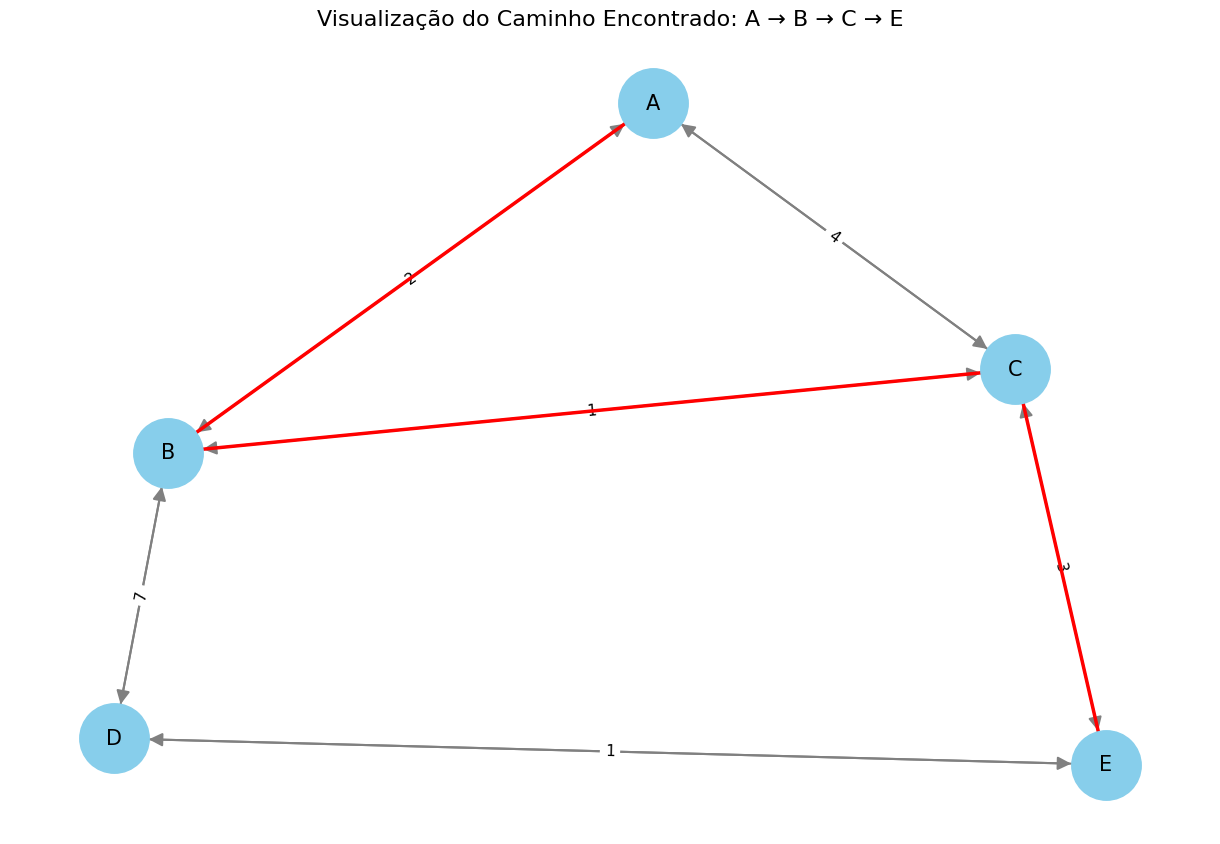

In [28]:
# ALGORITMO A* E ALGORITMO DE DIJKSTRA

"""
SCRIPT FINAL E COMENTADO

Este script realiza uma an√°lise comparativa de desempenho entre os algoritmos
A* e Dijkstra para encontrar o caminho mais curto em um grafo.

Funcionalidades:
1. Implementa os algoritmos A* e Dijkstra, medindo tempo de execu√ß√£o e uso de mem√≥ria.
2. Executa ambos os algoritmos com um conjunto de dados predefinido.
3. Imprime uma tabela comparativa dos resultados no console.
4. Gera e exibe uma visualiza√ß√£o gr√°fica do grafo, destacando o caminho
   encontrado pelo algoritmo A*.
"""

# ==============================================================================
# 1. IMPORTA√á√ÉO DE BIBLIOTECAS
# ==============================================================================
import time  # Para medir o tempo de execu√ß√£o dos algoritmos.
import sys   # Para estimar o uso de mem√≥ria das estruturas de dados.
import networkx as nx  # Biblioteca principal para cria√ß√£o e manipula√ß√£o de grafos.
import matplotlib.pyplot as plt  # Biblioteca para gerar os gr√°ficos.


# ==============================================================================
# 2. IMPLEMENTA√á√ÉO DOS ALGORITMOS DE BUSCA
# ==============================================================================

def executar_a_estrela(dados_grafo, estimativas_h, ponto_partida, ponto_chegada):
    """
    Executa o Algoritmo A* para encontrar o caminho mais curto.

    A* utiliza uma heur√≠stica para guiar sua busca, tornando-o geralmente
    mais r√°pido que o Dijkstra em grafos grandes.

    :param dados_grafo: Dicion√°rio representando o grafo.
    :param estimativas_h: Dicion√°rio com os custos heur√≠sticos de cada n√≥ at√© o objetivo.
    :param ponto_partida: N√≥ inicial da busca.
    :param ponto_chegada: N√≥ objetivo da busca.
    :return: Tupla com (caminho, custo, tempo_de_execucao, memoria_utilizada).
    """
    # Inicia a medi√ß√£o de tempo e a contagem de mem√≥ria.
    inicio_tempo = time.time()
    uso_memoria = 0
    
    # 'fronteira' (ou open list) armazena os n√≥s a serem explorados.
    # Cada item √© uma tupla: (f(n), g(n), n√≥, caminho_at√©_ele)
    # f(n) = g(n) + h(n) -> Custo total estimado
    # g(n) -> Custo real do caminho desde o in√≠cio
    fronteira = [(0 + estimativas_h[ponto_partida], 0, ponto_partida, [])]
    
    # 'explorados' (ou closed list) armazena n√≥s j√° visitados pelo caminho mais curto.
    explorados = set()

    # O loop continua enquanto houver n√≥s promissores na fronteira.
    while fronteira:
        # Ordena a fronteira para que o n√≥ com o menor custo f(n) seja o primeiro.
        fronteira.sort(key=lambda item: item[0])
        
        # Extrai o n√≥ mais promissor da fronteira para explor√°-lo.
        f_custo, g_custo, no_corrente, trilha = fronteira.pop(0)
        
        # Estima o uso de mem√≥ria (de forma simplificada) a cada itera√ß√£o.
        uso_memoria += sys.getsizeof(fronteira) + sys.getsizeof(explorados) + sys.getsizeof(trilha)

        # Se j√° encontramos um caminho mais curto para este n√≥, o ignoramos.
        if no_corrente in explorados:
            continue

        # Adiciona o n√≥ atual √† trilha do caminho.
        trilha = trilha + [no_corrente]
        # Marca o n√≥ como explorado.
        explorados.add(no_corrente)

        # CONDI√á√ÉO DE PARADA: Se o n√≥ atual √© o nosso objetivo, encontramos o caminho.
        if no_corrente == ponto_chegada:
            fim_tempo = time.time()
            tempo_execucao = fim_tempo - inicio_tempo
            return trilha, g_custo, tempo_execucao, uso_memoria

        # Expande o n√≥ atual, analisando seus vizinhos.
        for vizinho, custo_aresta in dados_grafo.get(no_corrente, []):
            if vizinho not in explorados:
                # Calcula o novo custo real (g) para o vizinho.
                g_novo = g_custo + custo_aresta
                # Calcula o novo custo estimado (f) para o vizinho.
                f_novo = g_novo + estimativas_h[vizinho]
                # Adiciona o vizinho √† fronteira para futura explora√ß√£o.
                fronteira.append((f_novo, g_novo, vizinho, trilha))

    # Se a fronteira ficar vazia e o objetivo n√£o for alcan√ßado, n√£o h√° caminho.
    fim_tempo = time.time()
    tempo_execucao = fim_tempo - inicio_tempo
    return None, float('inf'), tempo_execucao, uso_memoria


def executar_dijkstra(dados_grafo, ponto_partida, ponto_chegada):
    """
    Executa o Algoritmo de Dijkstra para encontrar o caminho mais curto.

    Dijkstra explora o grafo de forma radial, sempre escolhendo o n√≥
    com a menor dist√¢ncia acumulada desde a origem.

    :param dados_grafo: Dicion√°rio representando o grafo.
    :param ponto_partida: N√≥ inicial da busca.
    :param ponto_chegada: N√≥ objetivo da busca.
    :return: Tupla com (caminho, custo, tempo_de_execucao, memoria_utilizada).
    """
    # Inicia a medi√ß√£o de tempo e a contagem de mem√≥ria.
    inicio_tempo = time.time()
    uso_memoria = 0
    
    # Dicion√°rio para armazenar a menor dist√¢ncia encontrada at√© cada n√≥.
    distancias = {no: float('inf') for no in dados_grafo}
    # Dicion√°rio para rastrear o "pai" de cada n√≥ no caminho mais curto.
    antecessores = {no: None for no in dados_grafo}
    # A dist√¢ncia da origem para ela mesma √© sempre 0.
    distancias[ponto_partida] = 0
    # Lista de n√≥s que ainda n√£o foram visitados.
    nao_visitados = list(dados_grafo.keys())

    while nao_visitados:
        # Encontra o n√≥ n√£o visitado com a menor dist√¢ncia registrada.
        no_corrente = min(nao_visitados, key=lambda no: distancias[no])
        
        uso_memoria += sys.getsizeof(nao_visitados) + sys.getsizeof(distancias) + sys.getsizeof(antecessores)

        # CONDI√á√ÉO DE PARADA: Se o n√≥ mais pr√≥ximo est√° a uma dist√¢ncia infinita ou se j√° √© o objetivo.
        if distancias[no_corrente] == float('inf') or no_corrente == ponto_chegada:
            break

        # Remove o n√≥ atual da lista de n√£o visitados.
        nao_visitados.remove(no_corrente)

        # Para cada vizinho do n√≥ atual...
        for vizinho, custo_aresta in dados_grafo.get(no_corrente, []):
            # ...calcula a dist√¢ncia atrav√©s do n√≥ atual.
            nova_distancia = distancias[no_corrente] + custo_aresta
            # Se este caminho for mais curto do que o j√° conhecido...
            if nova_distancia < distancias[vizinho]:
                # ...atualiza a menor dist√¢ncia e o antecessor.
                distancias[vizinho] = nova_distancia
                antecessores[vizinho] = no_corrente

    # Ap√≥s o loop, reconstr√≥i o caminho do final para o in√≠cio.
    trilha = []
    if distancias[ponto_chegada] != float('inf'): # Verifica se um caminho foi encontrado.
        no_atual = ponto_chegada
        while no_atual is not None:
            trilha.insert(0, no_atual) # Insere no in√≠cio para manter a ordem correta.
            no_atual = antecessores.get(no_atual)
            
    fim_tempo = time.time()
    tempo_execucao = fim_tempo - inicio_tempo
    
    if not trilha:
        return None, float('inf'), tempo_execucao, uso_memoria
        
    return trilha, distancias[ponto_chegada], tempo_execucao, uso_memoria


# ==============================================================================
# 3. FUN√á√ÉO DE VISUALIZA√á√ÉO GR√ÅFICA
# ==============================================================================

def exibir_grafo_com_caminho(dados_grafo, caminho_destacado):
    """
    Cria e exibe uma visualiza√ß√£o do grafo usando NetworkX e Matplotlib,
    destacando um caminho espec√≠fico em vermelho.

    :param dados_grafo: Dicion√°rio com os dados do grafo.
    :param caminho_destacado: Lista de n√≥s que comp√µem o caminho a ser destacado.
    """
    # Cria um objeto de grafo direcionado (com setas).
    G = nx.DiGraph()
    # Adiciona as arestas e pesos a partir dos dados.
    for no, arestas in dados_grafo.items():
        for vizinho, custo in arestas:
            G.add_edge(no, vizinho, weight=custo)

    # Define o layout para posicionar os n√≥s de forma visualmente agrad√°vel.
    # O 'seed' garante que o layout seja sempre o mesmo, para reprodutibilidade.
    pos = nx.spring_layout(G, seed=42, k=0.8) # 'k' ajusta o espa√ßamento.
    
    # Prepara os dados para o desenho.
    rotulos_arestas = nx.get_edge_attributes(G, 'weight')
    arestas_do_caminho = list(zip(caminho_destacado, caminho_destacado[1:]))

    # Cria a figura onde o gr√°fico ser√° desenhado.
    plt.figure(figsize=(12, 8))
    
    # Desenha o grafo base (n√≥s e todas as arestas em cinza).
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, 
            font_size=15, width=1.5, edge_color='gray', arrows=True, arrowsize=20)
    
    # Adiciona os r√≥tulos de peso √†s arestas.
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos_arestas, font_size=11)
    
    # Desenha por cima apenas as arestas do caminho encontrado, em vermelho.
    nx.draw_networkx_edges(G, pos, edgelist=arestas_do_caminho, edge_color='red', width=2.5, arrowsize=20)
    
    # Define o t√≠tulo e exibe o gr√°fico.
    plt.title(f"Visualiza√ß√£o do Caminho Encontrado: {' ‚Üí '.join(caminho_destacado)}", size=16)
    plt.show()


# ==============================================================================
# 4. BLOCO DE EXECU√á√ÉO PRINCIPAL
# ==============================================================================

# Este bloco s√≥ √© executado quando o script √© rodado diretamente.
if __name__ == "__main__":
    
    # --- Defini√ß√£o dos Dados de Entrada ---
    # Estrutura do grafo: {origem: [(destino, custo), ...]}
    mapa_dos_nos = {
        'A': [('B', 2), ('C', 4)],
        'B': [('A', 2), ('C', 1), ('D', 7)],
        'C': [('A', 4), ('B', 1), ('E', 3)],
        'D': [('B', 7), ('E', 1)],
        'E': [('C', 3), ('D', 1)],
    }
    # Heur√≠stica (custo estimado) de cada n√≥ at√© o ponto final 'E'.
    estimativas_para_o_final = { 'A': 6, 'B': 4, 'C': 2, 'D': 1, 'E': 0 }
    
    # Pontos de partida e chegada.
    ponto_de_partida = 'A'
    ponto_de_chegada = 'E'

    # --- Execu√ß√£o dos Algoritmos ---
    # Roda o A* e armazena seus resultados.
    caminho_a, custo_a, tempo_a, memoria_a = executar_a_estrela(mapa_dos_nos, estimativas_para_o_final, ponto_de_partida, ponto_de_chegada)
    # Roda o Dijkstra e armazena seus resultados.
    caminho_d, custo_d, tempo_d, memoria_d = executar_dijkstra(mapa_dos_nos, ponto_de_partida, ponto_de_chegada)

    # --- Apresenta√ß√£o dos Resultados no Console ---
    print("=" * 45)
    print("      RESULTADO DA COMPARA√á√ÉO DE ALGORITMOS")
    print("=" * 45)
    
    print("\n**Algoritmo A***")
    if caminho_a:
        print(f"Caminho Encontrado: {' -> '.join(caminho_a)}")
        print(f"Custo Total: {custo_a}")
    else:
        print("Caminho n√£o encontrado.")
    print(f"Tempo de Execu√ß√£o (s): {tempo_a:.6f}")
    print(f"Uso de Mem√≥ria (bytes): {memoria_a}")

    print("\n**Algoritmo de Dijkstra**")
    if caminho_d:
        print(f"Caminho Encontrado: {' -> '.join(caminho_d)}")
        print(f"Custo Total: {custo_d}")
    else:
        print("Caminho n√£o encontrado.")
    print(f"Tempo de Execu√ß√£o (s): {tempo_d:.6f}")
    print(f"Uso de Mem√≥ria (bytes): {memoria_d}")
    print("-" * 45)

    # --- Gera√ß√£o da Visualiza√ß√£o Gr√°fica ---
    # Se o A* encontrou um caminho, exibe o grafo com esse caminho destacado.
    if caminho_a:
        print("\nExibindo o grafo com o caminho encontrado pelo A*...")
        exibir_grafo_com_caminho(mapa_dos_nos, caminho_a)
    else:
        print("\nN√£o foi poss√≠vel gerar o gr√°fico, pois nenhum caminho foi encontrado.")